Importuri si citire CSV

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pentru afisare mai ok in notebook
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", None)

CSV_PATH = "gestures_session.csv"  # asigură-te că notebook-ul e în același folder

df = pd.read_csv(CSV_PATH)
df.head()


,timestamp,fps,frame_time_ms,hailo_score,hailo_valid,mediapipe_landmarks,command,tcp_sent,tcp_reconnected,cx,cy
0,1.763912e+09,0.344283,2904.590368,0.0,0,0,No hand,1,NaN,-1,-1
1,1.763912e+09,18.762096,53.298950,0.0,0,0,No hand,0,0.0,-1,-1
2,1.763912e+09,19.761243,50.604105,0.0,0,0,No hand,0,0.0,-1,-1
3,1.763912e+09,17.077229,58.557510,0.0,0,0,No hand,0,0.0,-1,-1
4,1.763912e+09,19.692585,50.780535,0.0,0,0,No hand,0,0.0,-1,-1


Preprocesare de baza

In [2]:
# Timp relativ (secunde) față de primul frame
df["t0"] = df["timestamp"] - df["timestamp"].iloc[0]

# Convertim hailo_valid la bool
df["hailo_valid_bool"] = df["hailo_valid"].astype(bool)

# Înlocuim -1 la cx, cy cu NaN pentru analize mai curate
df["cx_clean"] = df["cx"].replace(-1, np.nan)
df["cy_clean"] = df["cy"].replace(-1, np.nan)

df.describe(include="all")


,timestamp,fps,frame_time_ms,hailo_score,hailo_valid,mediapipe_landmarks,command,tcp_sent,tcp_reconnected,cx,cy,t0,hailo_valid_bool,cx_clean,cy_clean
count,1.980000e+03,1980.000000,1980.000000,1980.0,1980.0,1980.000000,1980,1980.000000,1960.0,1980.000000,1980.000000,1980.000000,1980,1102.000000,1102.00000
unique,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,No hand,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,878,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN
mean,1.763912e+09,22.772690,48.614537,0.0,0.0,11.030303,NaN,0.034343,0.0,77.016667,102.923737,71.934592,NaN,139.175136,185.72323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,1.763912e+09,0.344283,33.830404,0.0,0.0,0.000000,NaN,0.000000,0.0,-1.000000,-1.000000,0.000000,NaN,2.000000,3.00000
25%,1.763912e+09,20.748962,39.863050,0.0,0.0,0.000000,NaN,0.000000,0.0,-1.000000,-1.000000,28.126852,NaN,115.000000,167.00000
50%,1.763912e+09,22.507427,44.429779,0.0,0.0,21.000000,NaN,0.000000,0.0,87.000000,153.000000,84.456175,NaN,139.000000,181.00000
75%,1.763912e+09,25.085888,48.195183,0.0,0.0,21.000000,NaN,0.000000,0.0,144.000000,184.000000,109.726468,NaN,160.000000,207.00000


FPS in timp util + salvare PNG

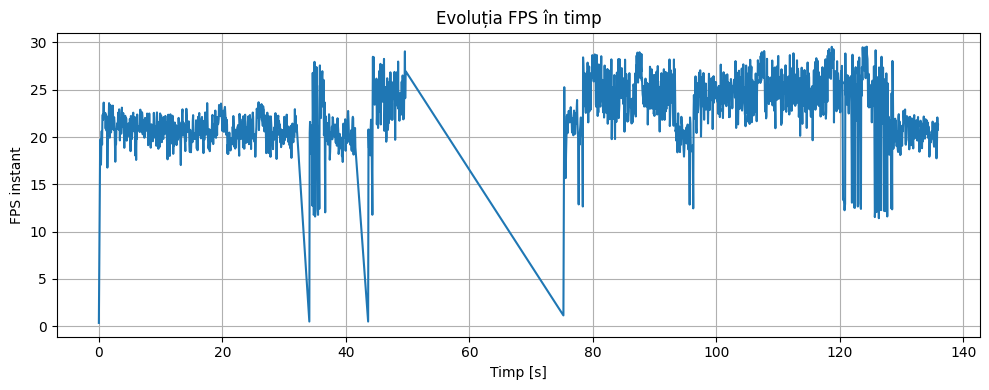

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(df["t0"], df["fps"])
plt.xlabel("Timp [s]")
plt.ylabel("FPS instant")
plt.title("Evoluția FPS în timp")
plt.grid(True)

plt.tight_layout()
plt.savefig("fps_over_time.png", dpi=150)
plt.show()


Histograma FPS

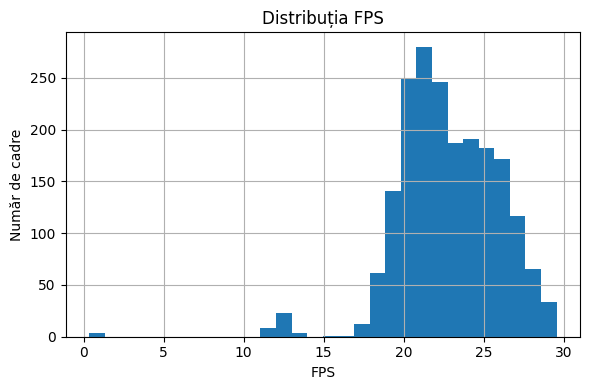

In [4]:
plt.figure(figsize=(6, 4))
plt.hist(df["fps"], bins=30)
plt.xlabel("FPS")
plt.ylabel("Număr de cadre")
plt.title("Distribuția FPS")
plt.grid(True)

plt.tight_layout()
plt.savefig("fps_histogram.png", dpi=150)
plt.show()


Latenta pe cadru (ms)

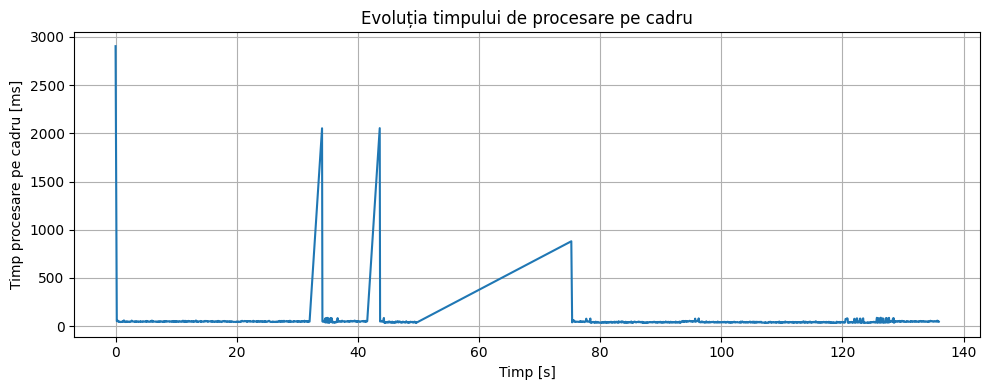

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(df["t0"], df["frame_time_ms"])
plt.xlabel("Timp [s]")
plt.ylabel("Timp procesare pe cadru [ms]")
plt.title("Evoluția timpului de procesare pe cadru")
plt.grid(True)

plt.tight_layout()
plt.savefig("frame_time_over_time.png", dpi=150)
plt.show()


Scor HAILO in timp + validare

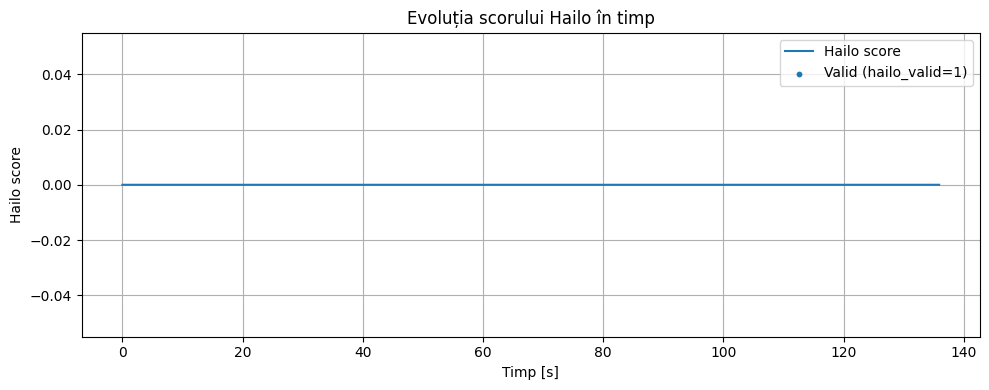

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(df["t0"], df["hailo_score"], label="Hailo score")

# marcăm punctele unde hailo_valid == 1
valid_mask = df["hailo_valid_bool"]
plt.scatter(df.loc[valid_mask, "t0"],
            df.loc[valid_mask, "hailo_score"],
            marker="o", s=10, label="Valid (hailo_valid=1)")

plt.xlabel("Timp [s]")
plt.ylabel("Hailo score")
plt.title("Evoluția scorului Hailo în timp")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("hailo_score_over_time.png", dpi=150)
plt.show()


Număr de puncte MediaPipe

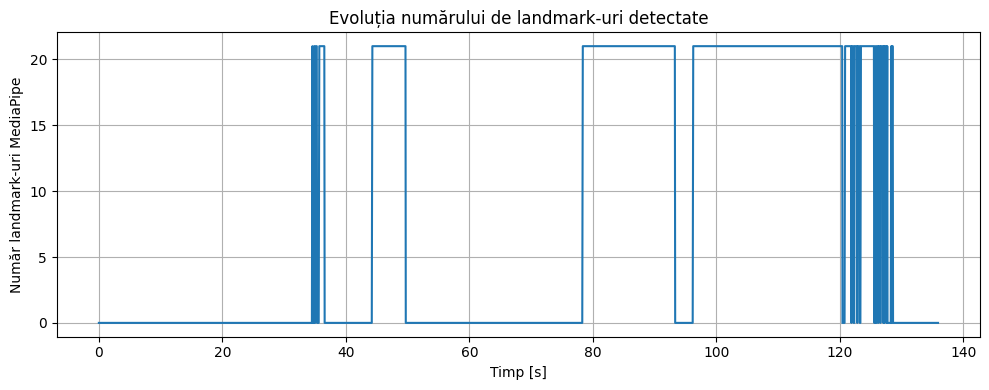

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(df["t0"], df["mediapipe_landmarks"])
plt.xlabel("Timp [s]")
plt.ylabel("Număr landmark-uri MediaPipe")
plt.title("Evoluția numărului de landmark-uri detectate")
plt.grid(True)

plt.tight_layout()
plt.savefig("mediapipe_points_over_time.png", dpi=150)
plt.show()



Distributia comenzilor (bar chart)

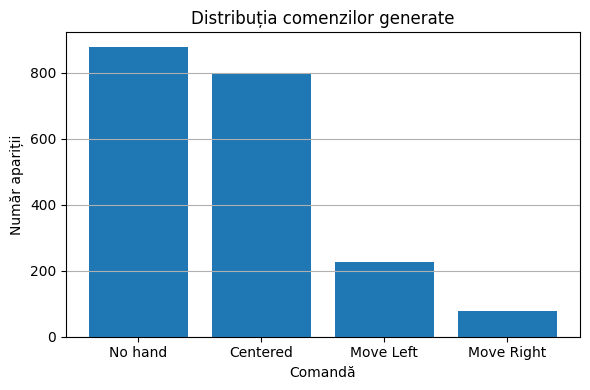

command
No hand       878
Centered      797
Move Left     227
Move Right     78
Name: count, dtype: int64

In [10]:
command_counts = df["command"].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(command_counts.index, command_counts.values)
plt.xlabel("Comandă")
plt.ylabel("Număr apariții")
plt.title("Distribuția comenzilor generate")
plt.grid(True, axis="y")

plt.tight_layout()
plt.savefig("command_distribution.png", dpi=150)
plt.show()

command_counts


Poziția centroidului în ROI (heatmap scatter)

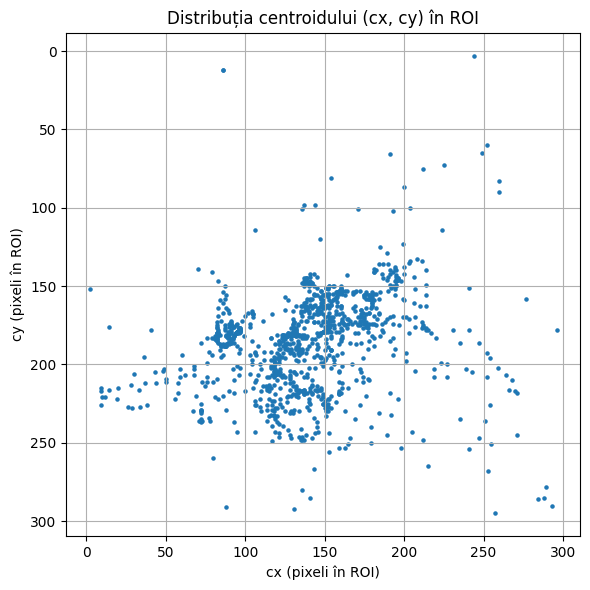

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(df["cx_clean"], df["cy_clean"], s=5)
plt.xlabel("cx (pixeli în ROI)")
plt.ylabel("cy (pixeli în ROI)")
plt.title("Distribuția centroidului (cx, cy) în ROI")
plt.gca().invert_yaxis()  # ca în coordonatele de imagine
plt.grid(True)

plt.tight_layout()
plt.savefig("centroid_scatter.png", dpi=150)
plt.show()


Statistici sumar pentru lucrare

In [13]:
stats = {
    "FPS mediu": df["fps"].mean(),
    "FPS minim": df["fps"].min(),
    "FPS maxim": df["fps"].max(),

    "Timp procesare mediu (ms)": df["frame_time_ms"].mean(),
    "Hailo score mediu": df["hailo_score"].mean(),
    "Hailo score maxim": df["hailo_score"].max(),
    "Rată validare Hailo": df["hailo_valid"].mean(),

    "Landmark-uri MediaPipe (medie)": df["mediapipe_landmarks"].mean(),

    "Comenzi trimise": df["tcp_sent"].sum(),
    "Reconectări TCP": df["tcp_reconnected"].sum()
}

stats_df = pd.DataFrame.from_dict(stats, orient='index', columns=["Valoare"])
stats_df


,Valoare
FPS mediu,22.772690
FPS minim,0.344283
FPS maxim,29.559209
Timp procesare mediu (ms),48.614537
Hailo score mediu,0.000000
Hailo score maxim,0.000000
Rată validare Hailo,0.000000
Landmark-uri MediaPipe (medie),11.030303
Comenzi trimise,68.000000
Reconectări TCP,0.000000
